### Poland Presidential Elections 2020

The goal of this notebook is to provide some visualisation for the Polish 2020 presidential elections. 

Source: https://prezydent20200628.pkw.gov.pl/prezydent20200628/pl/dane_w_arkuszach

### Importing necessary packages

In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

### Loading the data

In [2]:
df = pandas.read_csv("..\\data\\1st round\\wyniki_gl_na_kand_po_powiatach_proc_utf8.csv", delimiter=";", decimal=",")
df.head()

,Nr OKW,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,% głosów ważnych,...,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Marek JAKUBIAK,Władysław Marcin KOSINIAK-KAMYSZ,Mirosław Mariusz PIOTROWSKI,Paweł Jan TANAJNO,Rafał Kazimierz TRZASKOWSKI,Waldemar Włodzimierz WITKOWSKI,Stanisław Józef ŻÓŁTEK,Liczba obwodów
0,2,20100,bolesławiecki,dolnośląskie,60.09,0.39,36.48,63.52,0.0,99.61,...,41.56,16.39,0.13,1.54,0.07,0.12,31.03,0.13,0.24,63
1,4,20200,dzierżoniowski,dolnośląskie,58.95,0.34,35.22,64.78,0.0,99.66,...,44.03,13.67,0.12,1.48,0.10,0.18,31.87,0.10,0.19,83
2,3,20300,głogowski,dolnośląskie,62.57,0.29,30.65,69.35,0.0,99.71,...,44.19,14.21,0.10,1.75,0.10,0.14,30.94,0.10,0.20,53
3,1,20400,górowski,dolnośląskie,54.05,0.27,27.50,72.50,0.0,99.73,...,50.04,13.14,0.14,2.59,0.08,0.10,25.49,0.07,0.15,23
4,2,20500,jaworski,dolnośląskie,58.95,0.39,38.04,61.96,0.0,99.61,...,47.78,11.18,0.12,3.08,0.12,0.09,28.77,0.06,0.19,39


Dropping unneeded columns.

In [3]:
df = df.drop(df.columns[[0,6,7,8]], axis=1)

### Loading the geodata

In [5]:
powiat_df = geopandas.read_file(r"..\\subdivision shapes\\Powiaty\\Powiaty.shp", encoding="utf-8")
woj_df = geopandas.read_file(r"..\\subdivision shapes\\Wojewodztwa\\Województwa.shp", encoding="utf-8")

In [7]:
powiat_df.head()

,JPT_KOD_JE,JPT_NAZWA_,geometry
0,1807,powiat krośnieński,"POLYGON ((21.89480 49.78109, 21.88301 49.76796..."
1,2804,powiat elbląski,"POLYGON ((19.97906 54.13375, 19.98676 54.11915..."
2,1415,powiat ostrołęcki,"POLYGON ((21.55169 53.47813, 21.56589 53.48095..."
3,0413,powiat sępoleński,"POLYGON ((17.39065 53.49096, 17.39383 53.50781..."
4,3019,powiat pilski,"POLYGON ((16.39053 53.13095, 16.39835 53.14838..."


I'll modify *KOD_TERYT* of *df* to conform to the territorial code as it exists in column *JPT_KOD_JE* of shape file dataframe. This includes stripping last two digits and adding a leading 0 in front of 3-digit codes.

In [10]:
df["Kod TERYT"] = df["Kod TERYT"].astype(str).str[:-2]
df["Kod TERYT"] = df["Kod TERYT"].apply(lambda x: '0' + x if len(x) == 3 else x)

In [11]:
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,Robert BIEDROŃ,Krzysztof BOSAK,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Marek JAKUBIAK,Władysław Marcin KOSINIAK-KAMYSZ,Mirosław Mariusz PIOTROWSKI,Paweł Jan TANAJNO,Rafał Kazimierz TRZASKOWSKI,Waldemar Włodzimierz WITKOWSKI,Stanisław Józef ŻÓŁTEK,Liczba obwodów
0,0201,bolesławiecki,dolnośląskie,60.09,0.39,99.61,2.08,6.72,41.56,16.39,0.13,1.54,0.07,0.12,31.03,0.13,0.24,63
1,0202,dzierżoniowski,dolnośląskie,58.95,0.34,99.66,2.16,6.09,44.03,13.67,0.12,1.48,0.10,0.18,31.87,0.10,0.19,83
2,0203,głogowski,dolnośląskie,62.57,0.29,99.71,2.33,5.95,44.19,14.21,0.10,1.75,0.10,0.14,30.94,0.10,0.20,53
3,0204,górowski,dolnośląskie,54.05,0.27,99.73,2.00,6.20,50.04,13.14,0.14,2.59,0.08,0.10,25.49,0.07,0.15,23
4,0205,jaworski,dolnośląskie,58.95,0.39,99.61,2.05,6.55,47.78,11.18,0.12,3.08,0.12,0.09,28.77,0.06,0.19,39


I'll save this dataframe to an Excel spreadsheet for use in Power BI.

In [13]:
df.to_excel("../data/elections2020_1st_round.xlsx")

Merging the geodata with the data containing the result of the elections.

In [12]:
merged_df = powiat_df.set_index("JPT_KOD_JE").join(df.set_index("Kod TERYT"))
merged_df.head()

,JPT_NAZWA_,geometry,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,Robert BIEDROŃ,Krzysztof BOSAK,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Marek JAKUBIAK,Władysław Marcin KOSINIAK-KAMYSZ,Mirosław Mariusz PIOTROWSKI,Paweł Jan TANAJNO,Rafał Kazimierz TRZASKOWSKI,Waldemar Włodzimierz WITKOWSKI,Stanisław Józef ŻÓŁTEK,Liczba obwodów
JPT_KOD_JE,,,,,,,,,,,,,,,,,,,
1807,powiat krośnieński,"POLYGON ((21.89480 49.78109, 21.88301 49.76796...",krośnieński,podkarpackie,63.31,0.27,99.73,1.58,8.97,63.72,8.96,0.19,2.34,0.09,0.09,13.74,0.07,0.25,106
2804,powiat elbląski,"POLYGON ((19.97906 54.13375, 19.98676 54.11915...",elbląski,warmińsko-mazurskie,51.73,0.37,99.63,1.69,6.02,43.14,15.12,0.17,2.95,0.07,0.08,30.48,0.10,0.18,43
1415,powiat ostrołęcki,"POLYGON ((21.55169 53.47813, 21.56589 53.48095...",ostrołęcki,mazowieckie,59.77,0.39,99.61,0.93,7.59,65.58,9.93,0.18,3.07,0.11,0.17,12.18,0.05,0.21,90
0413,powiat sępoleński,"POLYGON ((17.39065 53.49096, 17.39383 53.50781...",sępoleński,kujawsko-pomorskie,56.59,0.25,99.75,1.90,4.91,44.90,16.64,0.14,2.60,0.07,0.12,28.39,0.12,0.21,42
3019,powiat pilski,"POLYGON ((16.39053 53.13095, 16.39835 53.14838...",pilski,wielkopolskie,63.03,0.26,99.74,2.29,6.28,35.91,17.72,0.17,2.39,0.11,0.13,34.63,0.16,0.20,82


### Visualisation

Firstly I'll make a visualisation of the voter turnout. Let's start by printing some info regarding where the turnout was the highest..

In [10]:
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
mazowieckie,statki,97.36
mazowieckie,zagranica,83.18
mazowieckie,pruszkowski,75.15


Interesting. The data includes votes cast on ships at sea. It also counts the votes from abroad towards *Mazowieckie* province. I do think this high turnout will obfuscate results on the map, so I'll remove it from the dataframe.

In [11]:
df = df[df.Frekwencja < 80]
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
mazowieckie,pruszkowski,75.15
mazowieckie,Warszawa,74.40
pomorskie,Sopot,74.30


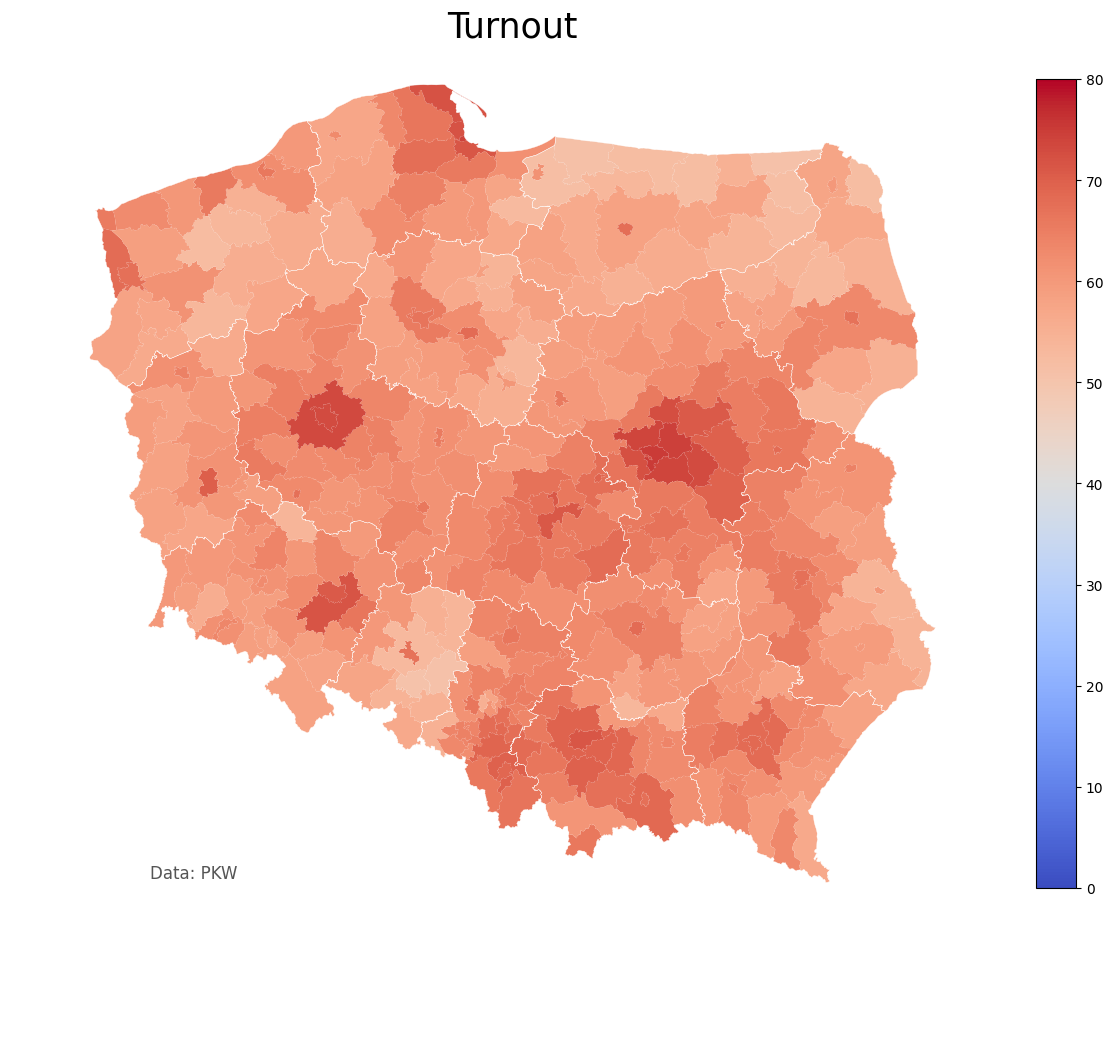

In [12]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Turnout", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
turnout_vmax = float(df['Frekwencja'].max())
scalarmappable = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=80))
cbar = fig.colorbar(scalarmappable, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Frekwencja", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=80);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
#plt.savefig("Turnout 1st round", dpi=200, bbox_inches='tight')

I'll now do the same with invalid ballots

In [13]:
display(HTML(df.nlargest(3, "% głosów nieważnych").to_html(columns=['Województwo', 'Powiat', '% głosów nieważnych'], index=False)))

Województwo,Powiat,% głosów nieważnych
mazowieckie,pułtuski,0.56
mazowieckie,przysuski,0.49
opolskie,głubczycki,0.49


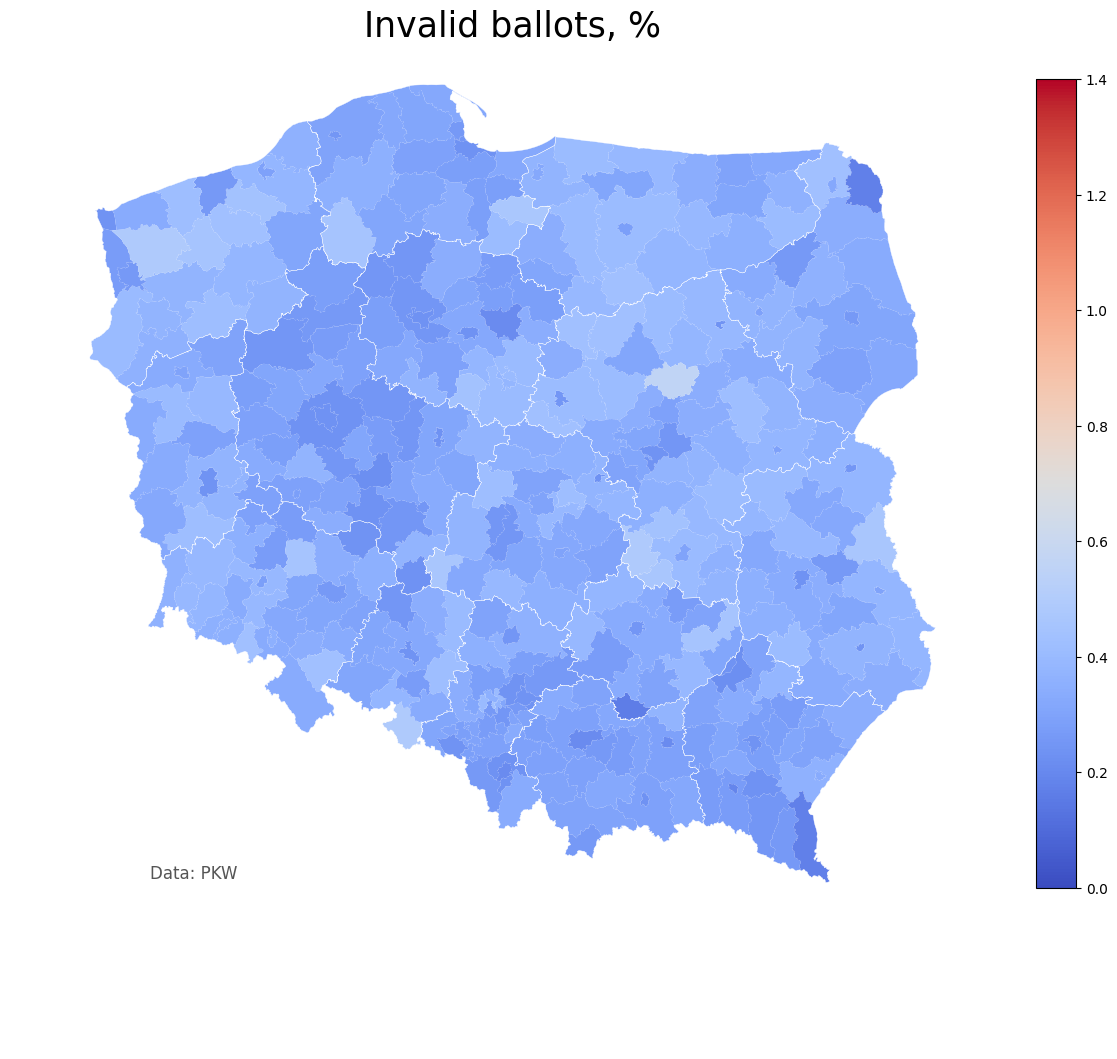

In [14]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Invalid ballots, %", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=1.4))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="% głosów nieważnych", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=1.4);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
#plt.savefig("Invalid ballots 1st round", dpi=200, bbox_inches='tight')

Now, I'll do the same visualisation with all major candidates.

In [15]:
duda_vmax = float(df['Andrzej Sebastian DUDA'].max())
display(HTML(df.nlargest(3, "Andrzej Sebastian DUDA").to_html(columns=['Województwo', 'Powiat', 'Andrzej Sebastian DUDA'], index=False)))

Województwo,Powiat,Andrzej Sebastian DUDA
lubelskie,janowski,75.04
mazowieckie,przysuski,72.13
podkarpackie,brzozowski,72.13


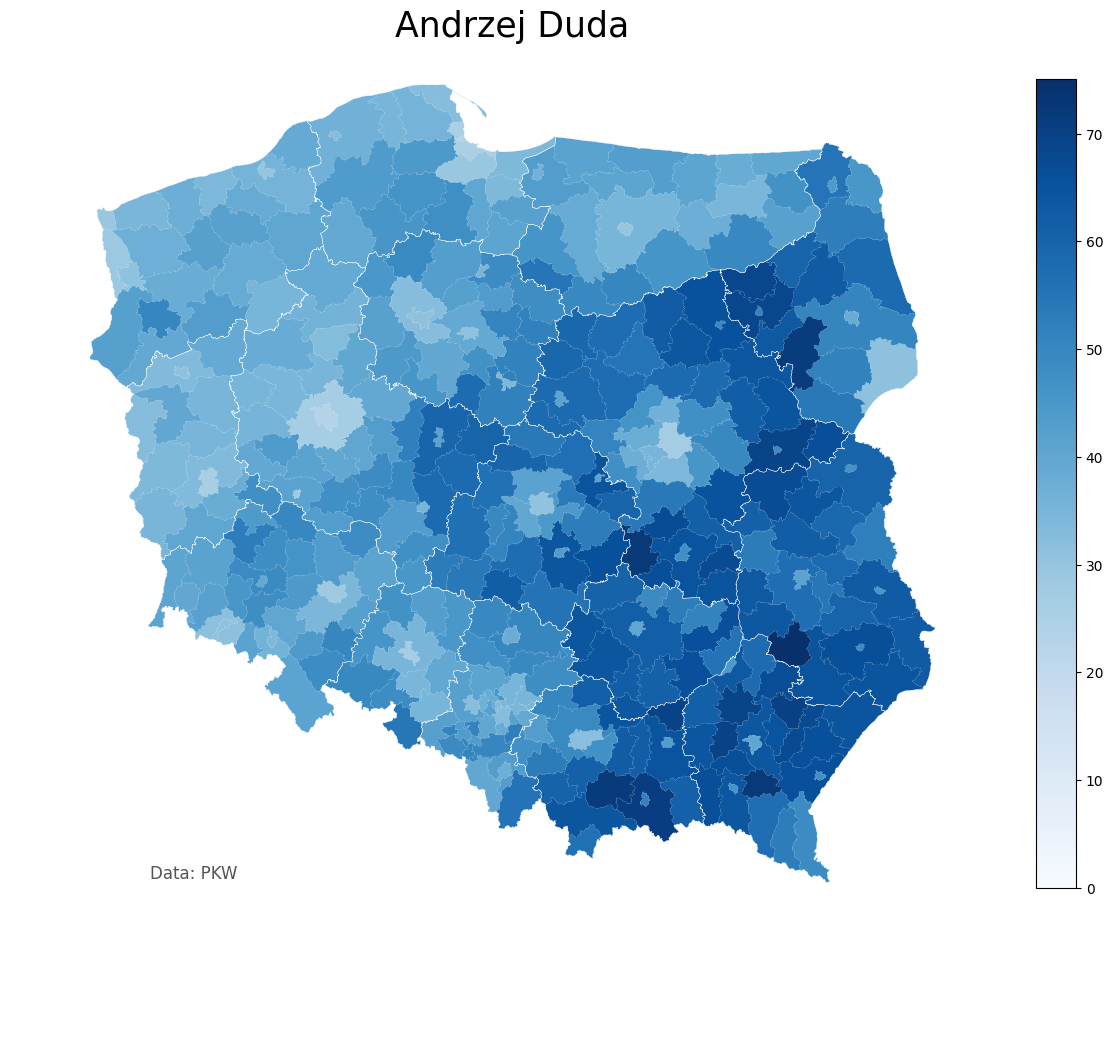

In [16]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Andrzej Duda", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Blues",
                           norm=plt.Normalize(vmin=0,vmax=duda_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Andrzej Sebastian DUDA", cmap="Blues", linewidth=0.1, ax=ax, vmin=0, vmax=duda_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
#plt.savefig("Duda 1st round", dpi=200, bbox_inches='tight')

In [17]:
trz_vmax = float(df['Rafał Kazimierz TRZASKOWSKI'].max())
display(HTML(df.nlargest(3, "Rafał Kazimierz TRZASKOWSKI").to_html(columns=['Województwo', 'Powiat', 'Rafał Kazimierz TRZASKOWSKI'], index=False)))

Województwo,Powiat,Rafał Kazimierz TRZASKOWSKI
pomorskie,Sopot,52.83
pomorskie,Gdynia,47.97
mazowieckie,Warszawa,47.58


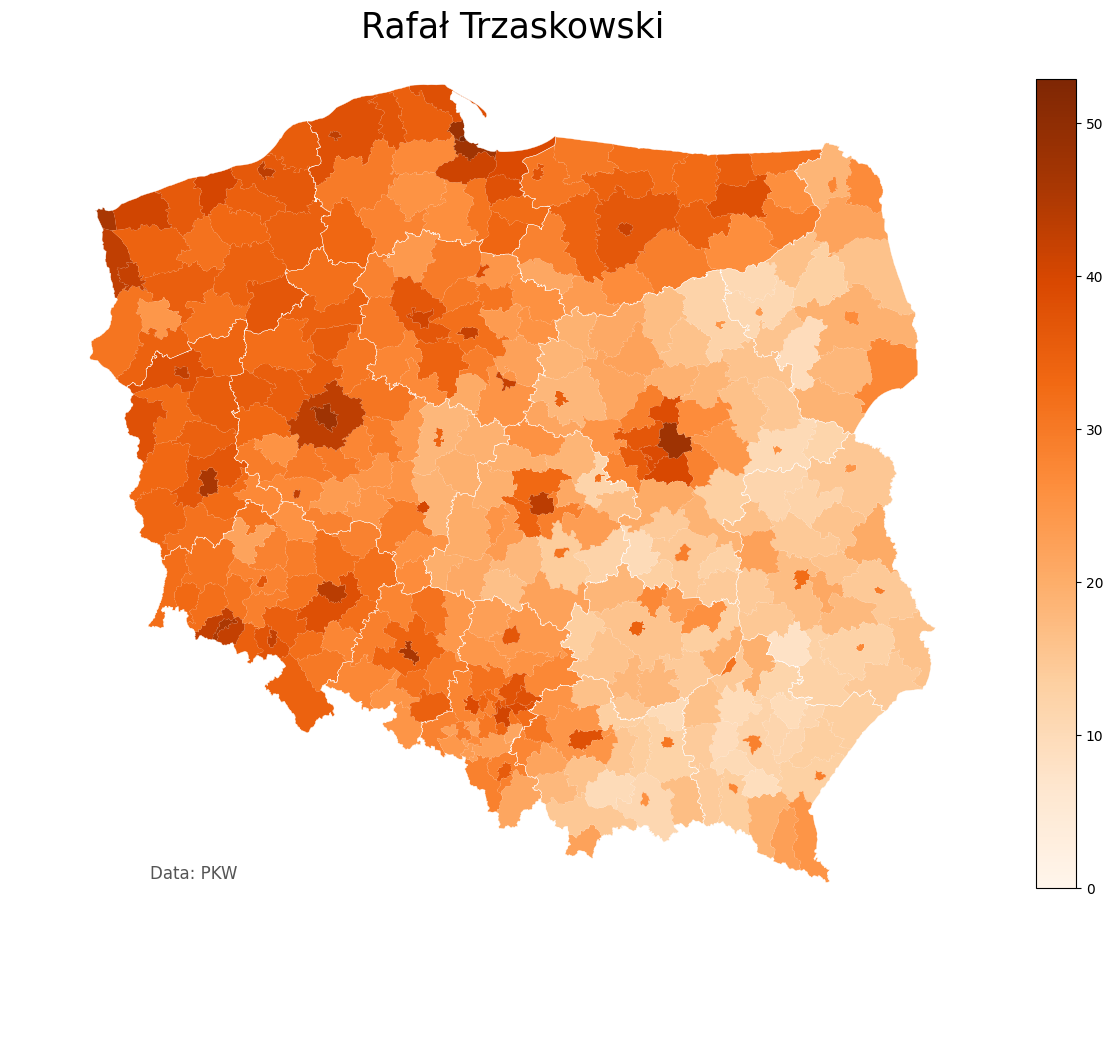

In [18]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Rafał Trzaskowski", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Oranges",
                           norm=plt.Normalize(vmin=0,vmax=trz_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Rafał Kazimierz TRZASKOWSKI", cmap="Oranges", linewidth=.1, ax=ax, vmin=0, vmax=trz_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
#plt.savefig("Trzaskowski 1st round", dpi=200, bbox_inches='tight')

In [19]:
holow_vmax = float(df['Szymon Franciszek HOŁOWNIA'].max())
display(HTML(df.nlargest(3, "Szymon Franciszek HOŁOWNIA").to_html(columns=['Województwo', 'Powiat', 'Szymon Franciszek HOŁOWNIA'], index=False)))

Województwo,Powiat,Szymon Franciszek HOŁOWNIA
podlaskie,hajnowski,29.13
lubuskie,krośnieński,22.99
opolskie,krapkowicki,22.45


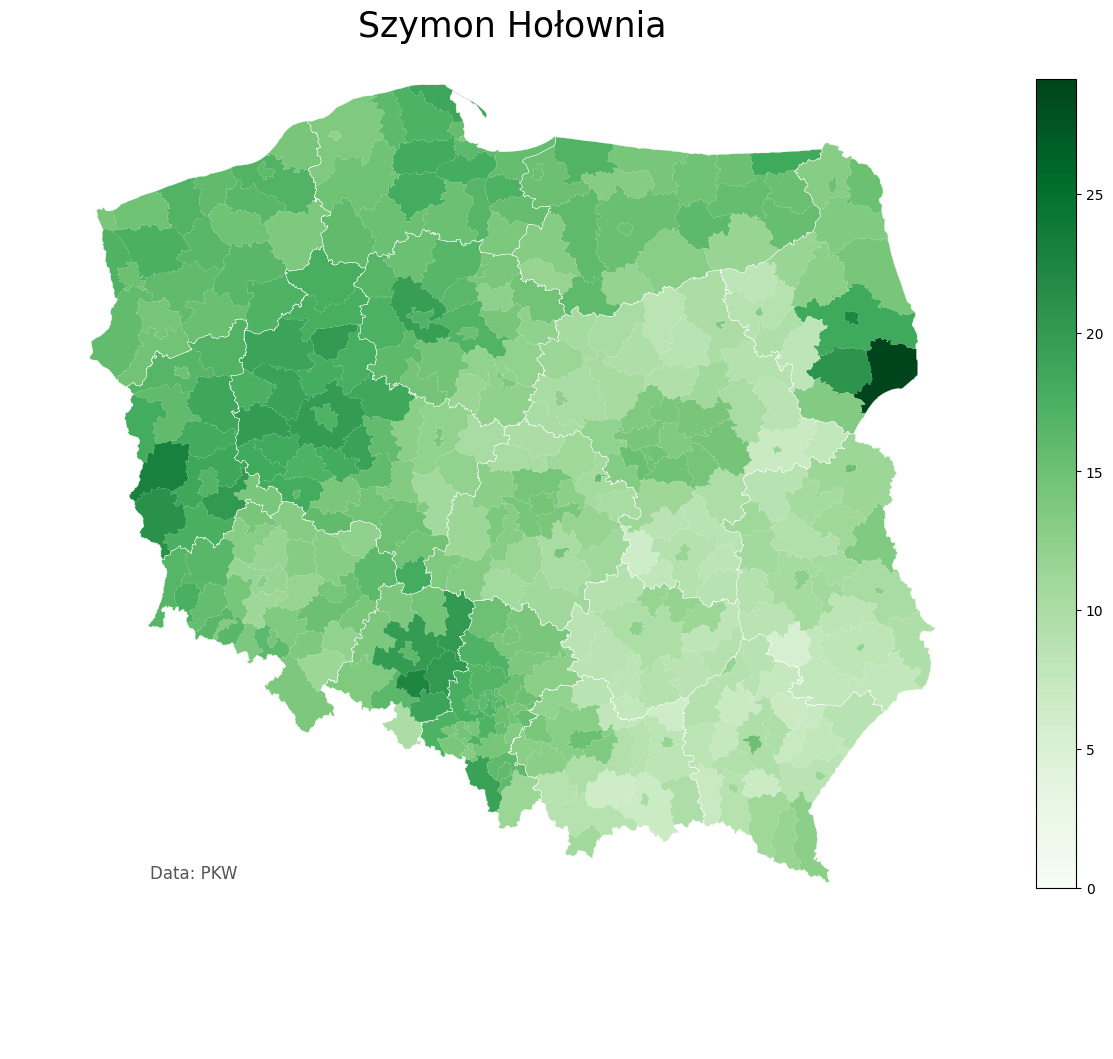

In [20]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Szymon Hołownia", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")

sm = plt.cm.ScalarMappable(cmap="Greens",
                           norm=plt.Normalize(vmin=0,vmax=holow_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Szymon Franciszek HOŁOWNIA", cmap="Greens", linewidth=.1, ax=ax, vmin=0,vmax=holow_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
#plt.savefig("Holownia 1st round", dpi=200, bbox_inches='tight')

In [21]:
bosak_vmax = float(df['Krzysztof BOSAK'].max())
display(HTML(df.nlargest(3, "Krzysztof BOSAK").to_html(columns=['Województwo', 'Powiat', 'Krzysztof BOSAK'], index=False)))

Województwo,Powiat,Krzysztof BOSAK
lubelskie,łęczyński,10.66
podkarpackie,rzeszowski,10.18
podkarpackie,Rzeszów,10.02


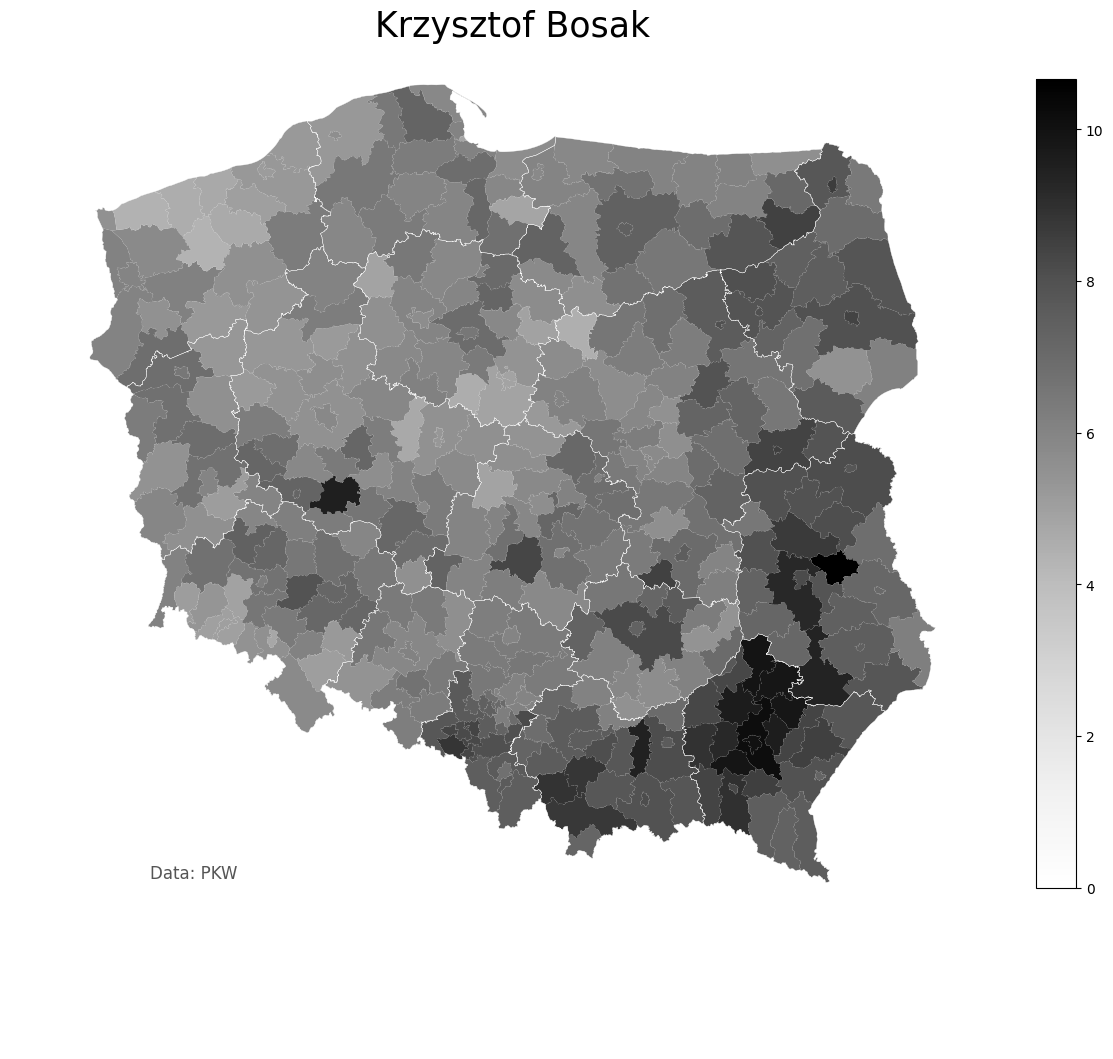

In [22]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Krzysztof Bosak", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Greys",
                           norm=plt.Normalize(vmin=0,vmax=bosak_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Krzysztof BOSAK", cmap="Greys", linewidth=.1, ax=ax, vmin=0, vmax=bosak_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
#plt.savefig("Bosak 1st round", dpi=200, bbox_inches='tight')

In [23]:
kkamysz_vmax = float(df['Władysław Marcin KOSINIAK-KAMYSZ'].max())
display(HTML(df.nlargest(3, "Władysław Marcin KOSINIAK-KAMYSZ").to_html(columns=['Województwo', 'Powiat', 'Władysław Marcin KOSINIAK-KAMYSZ'], index=False)))

Województwo,Powiat,Władysław Marcin KOSINIAK-KAMYSZ
świętokrzyskie,sandomierski,6.36
świętokrzyskie,kazimierski,6.32
małopolskie,proszowicki,6.08


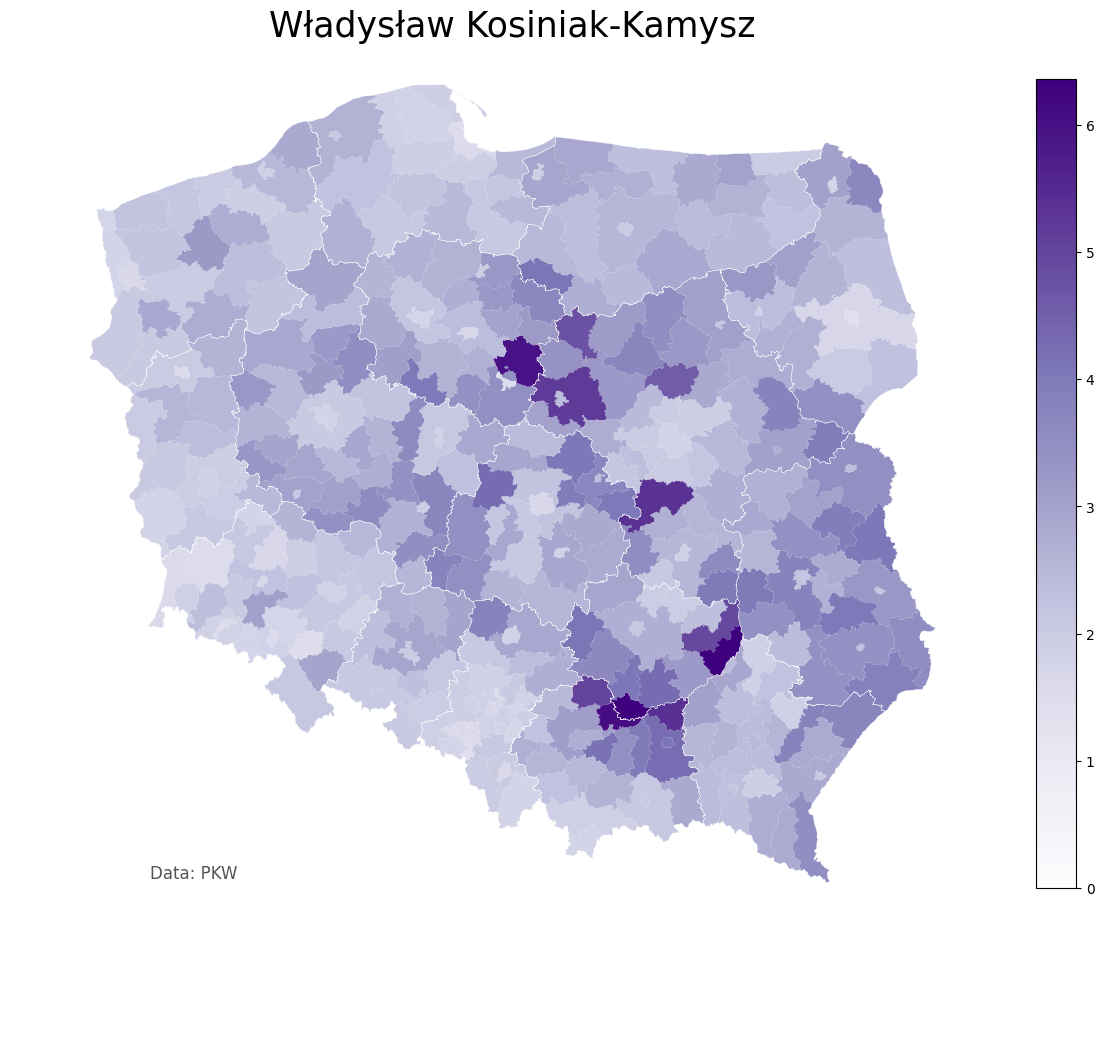

In [24]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Władysław Kosiniak-Kamysz", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Purples",
                           norm=plt.Normalize(vmin=0,vmax=kkamysz_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Władysław Marcin KOSINIAK-KAMYSZ", cmap="Purples", linewidth=.1, ax=ax, vmin=0, vmax=kkamysz_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
#plt.savefig("Kamysz 1st round", dpi=200, bbox_inches='tight')

In [25]:
biedron_vmax = float(df['Robert BIEDROŃ'].max())
display(HTML(df.nlargest(3, "Robert BIEDROŃ").to_html(columns=['Województwo', 'Powiat', 'Robert BIEDROŃ'], index=False)))

Województwo,Powiat,Robert BIEDROŃ
dolnośląskie,Wrocław,3.91
wielkopolskie,Poznań,3.80
pomorskie,Słupsk,3.75


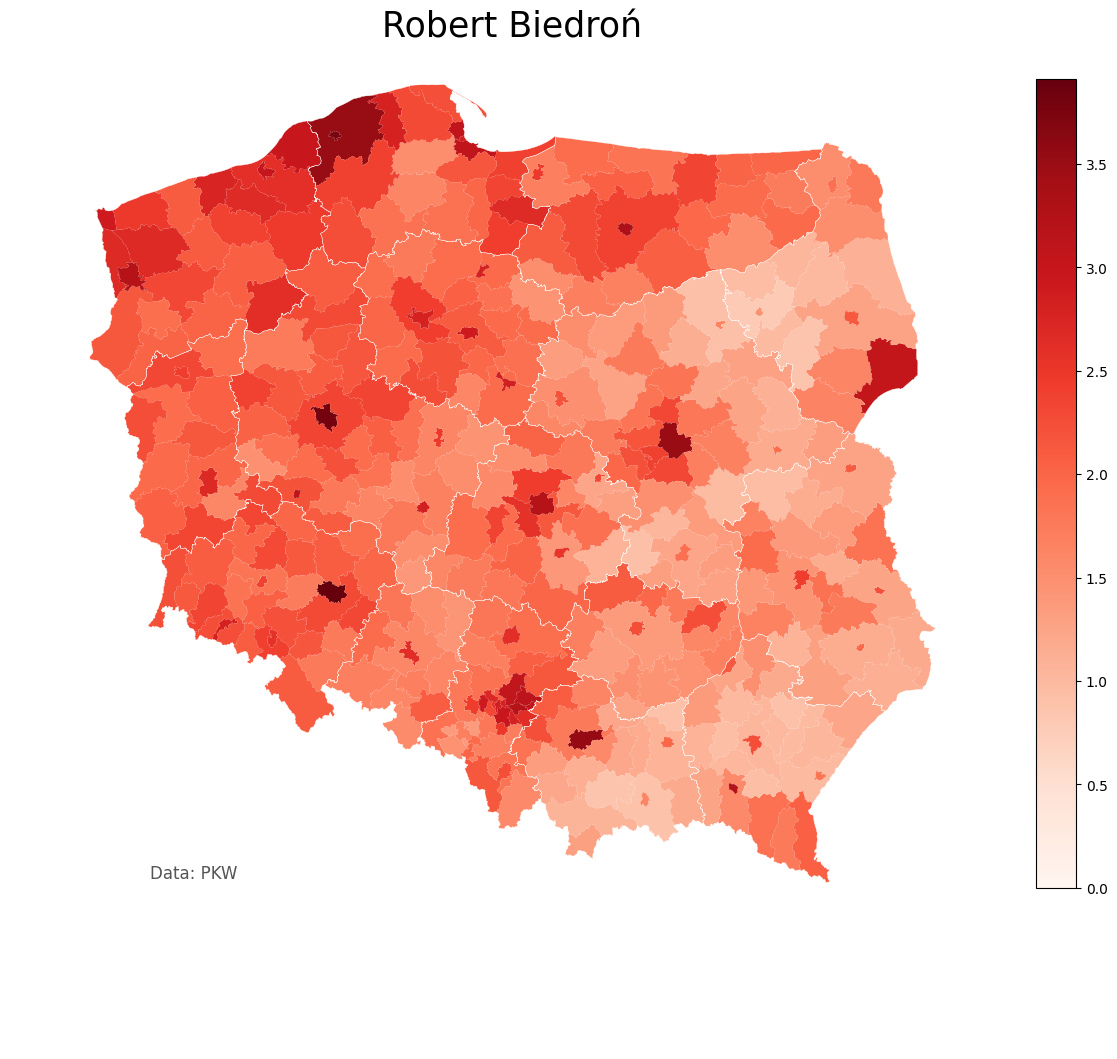

In [26]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Robert Biedroń", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")

sm = plt.cm.ScalarMappable(cmap="Reds",
                           norm=plt.Normalize(vmin=0,vmax=biedron_vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Robert BIEDROŃ", cmap="Reds", linewidth=.1, ax=ax, vmin=0, vmax=biedron_vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
#plt.savefig("Biedron 1st round", dpi=200, bbox_inches='tight')

In [27]:
def winning_fraction(row, candidates_a, candidates_b):
    if sum([row[cand] for cand in candidates_a]) > sum([row[cand] for cand in candidates_b]):
        return 0
    else: return 1

In [28]:
merged_df["WINNING_FRACTION"] = \
merged_df.apply(lambda row: winning_fraction(row, ["Rafał Kazimierz TRZASKOWSKI", "Szymon Franciszek HOŁOWNIA",
                                                   "Robert BIEDROŃ", "Władysław Marcin KOSINIAK-KAMYSZ", "Krzysztof BOSAK"],
                                             ["Andrzej Sebastian DUDA"]), axis=1)

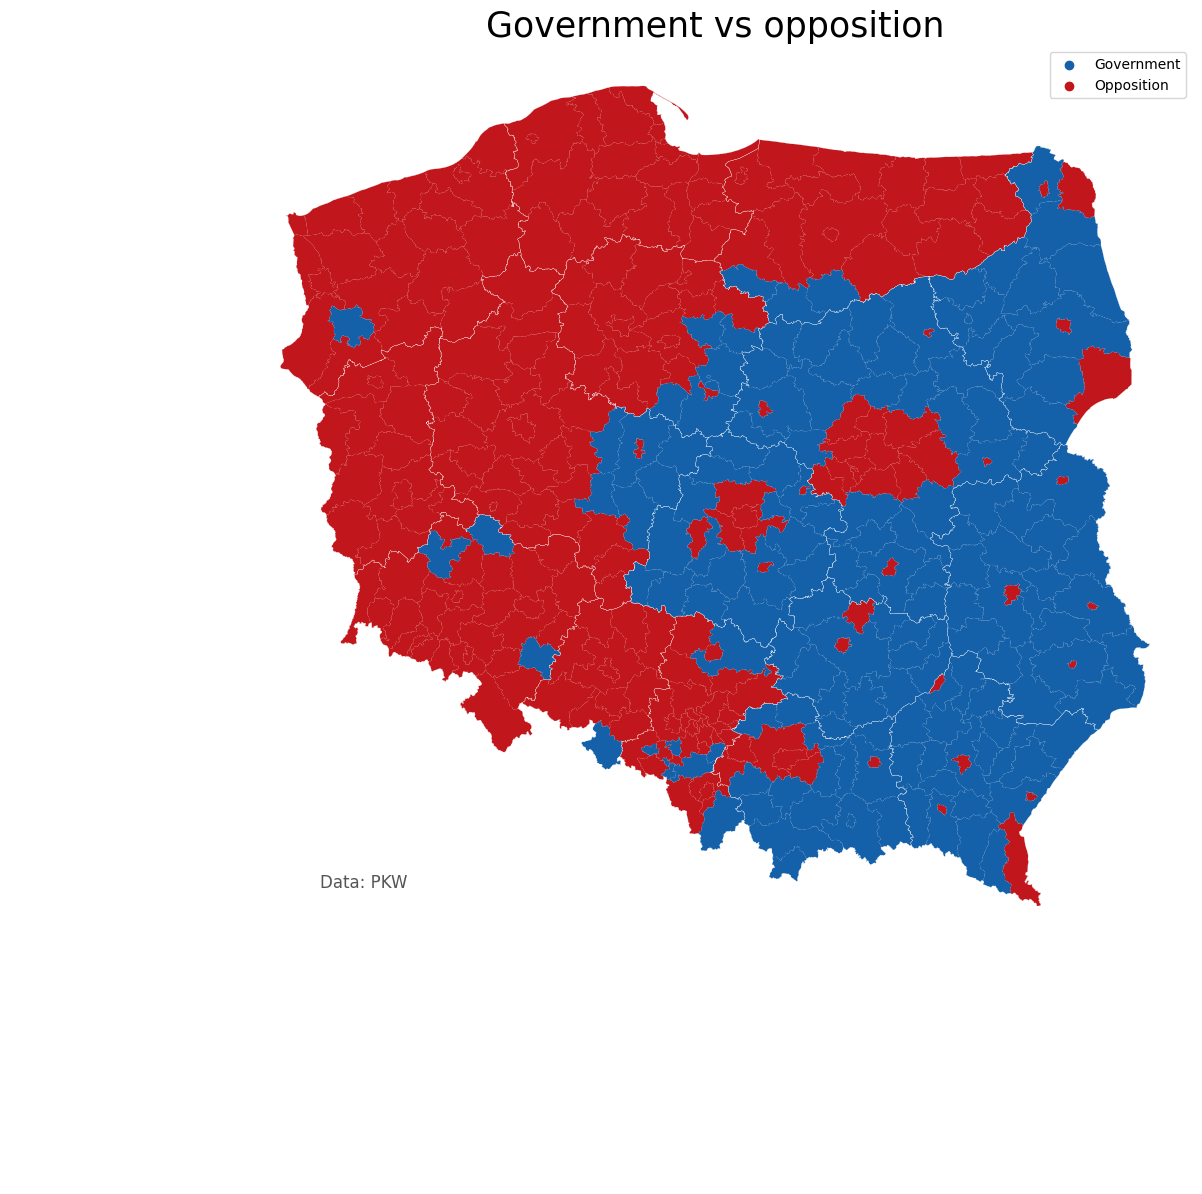

In [29]:
fractions = {0: '#C1161B',
          1: '#1561A9'}
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.set_title("Government vs opposition", fontdict={"fontsize": "25", "fontweight" : "3"})
divider = make_axes_locatable(ax)
ax.axis("off")
ax.annotate("Data: PKW",xy=(.16, .16),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")

for fraction, color in fractions.items():
    merged_df[merged_df.WINNING_FRACTION==fraction].plot(color=color, linewidth=.0, ax=ax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.15);
cmap = ListedColormap(['#1561A9', '#C1161B'])
lbls = ["Government","Opposition"]
[ax.scatter([], [], color=cmap(i), label=lbls[i]) for i in range(2)]
ax.legend();
#plt.savefig("Government vs opposition", dpi=200, bbox_inches='tight')